# Proyek Analisis Data: Bike Sharing
- Nama: Muhammad Fitroh Amrilla
- Email: amrillafitroh@gmail.com
- Id Dicoding: fitrohamrilla

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana trend penyewaan sepeda oleh user casual dan user registered pada setiap bulan di tahun 2011 dan 2012?
- pertanyaan 2 : Apakah musim (season) mempengaruhi jumlah sepeda yang disewa ?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [37]:
# Mendeklarasikan dataset menjadi dataframe bernama day_df
day_df = pd.read_csv('data/day.csv')

In [38]:
# Menampilkan day_df
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [39]:
# Mendeklarasikan dataset menjadi dataframe bernama hour_df
hour_df = pd.read_csv('data/hour.csv')

In [40]:
# Menampilkan hour_df
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [41]:
# Menampilkan informasi dataframe day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [42]:
# Mencari data yang duplikat pada dataframe day
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [43]:
# Mencari data yang kosong/null pada dataframe day
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [44]:
# Menampilkan informasi dataframe hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [45]:
# Mencari data yang duplikat pada dataframe hour
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
# Mengecek nilai statistik dataframe day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [47]:
# Mencari data yang kosong/null pada dataframe hour
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [48]:
# Mengecek nilai statistik dataframe hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Dataset day dan hour hanya berbeda pada data hour dimana data ini yang lebih cocok digunakan untuk menjawab pertanyaan bisnis yang ada. Oleh karena itu dataset day akan dihapus.

In [49]:
# Menghapus dataset day
del day_df

Menghapus kolom yang tidak digunakan

In [50]:
drop_col = ['holiday','weekday','workingday','temp','instant', 'weathersit', 'atemp', 'windspeed', 'hum']

for i in hour_df.columns:
  if i in drop_col:
    hour_df.drop(labels=i, axis=1, inplace=True)

hour_df.head()

,dteday,season,yr,mnth,hr,casual,registered,cnt
0,2011-01-01,1,0,1,0,3,13,16
1,2011-01-01,1,0,1,1,8,32,40
2,2011-01-01,1,0,1,2,5,27,32
3,2011-01-01,1,0,1,3,3,10,13
4,2011-01-01,1,0,1,4,0,1,1


In [51]:
# Mengubah nama kolom pada dataframe agar lebih mudah dikenali
hour_df.rename(columns={'dteday':'datetime',
                        'yr':'year',
                        'mnth' : 'month',
                        'hr' : 'hour',
                        'casual' : 'user_casual',
                        'registered' : 'user_registered',
                        'cnt':'count_total'},
               inplace=True)

hour_df.head()

,datetime,season,year,month,hour,user_casual,user_registered,count_total
0,2011-01-01,1,0,1,0,3,13,16
1,2011-01-01,1,0,1,1,8,32,40
2,2011-01-01,1,0,1,2,5,27,32
3,2011-01-01,1,0,1,3,3,10,13
4,2011-01-01,1,0,1,4,0,1,1


In [52]:
# Mengubah type kolom datetime menjadi datetime
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

hour_df.head()

,datetime,season,year,month,hour,user_casual,user_registered,count_total
0,2011-01-01,1,0,1,0,3,13,16
1,2011-01-01,1,0,1,1,8,32,40
2,2011-01-01,1,0,1,2,5,27,32
3,2011-01-01,1,0,1,3,3,10,13
4,2011-01-01,1,0,1,4,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Dataset `hour`

In [53]:
hour_df.describe()

,season,year,month,hour,user_casual,user_registered,count_total
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,367.000000,886.000000,977.000000


In [54]:
# Ekplorasi jumlah user registered dan user casual per bulan dan per tahun
data_per_month_year = hour_df.groupby(['year', 'month'])[['user_registered', 'user_casual']].sum().reset_index()
data_per_month_year

,year,month,user_registered,user_casual
0,0,1,35116,3073
1,0,2,41973,6242
2,0,3,51219,12826
3,0,4,72524,22346
4,0,5,104771,31050
5,0,6,112900,30612
6,0,7,104889,36452
7,0,8,107849,28842
8,0,9,100873,26545
9,0,10,98289,25222


In [55]:
# Membuat variabel data_2011 untuk ekplorasi jumlah user registered dan user casual pada setiap bulan di tahun 2011
data_2011 = hour_df[hour_df['year'] == 0]
monthly_data2011 = data_2011.groupby(by='month').agg({
    'user_casual':'sum',
    'user_registered':'sum'
})
monthly_data2011

,user_casual,user_registered
month,,
1,3073,35116
2,6242,41973
3,12826,51219
4,22346,72524
5,31050,104771
6,30612,112900
7,36452,104889
8,28842,107849
9,26545,100873


Penyewaan sepeda tertinggi pada tahun 2011 oleh user casual terjadi pada bulan ke-7 (Juli) sebanyak 36452 user, sedangkan oleh user registered terjadi pada bulan ke-6 (Juni) sebanyak 112900 user.

In [56]:
# Membuat variabel data_2012 untuk ekplorasi jumlah user registered dan user casual pada setiap bulan di tahun 2012
data_2012 = hour_df[hour_df['year'] == 1]
monthly_data2012 = data_2012.groupby(by='month').agg({
    'user_casual':'sum',
    'user_registered':'sum'
})
monthly_data2012

,user_casual,user_registered
month,,
1,8969,87775
2,8721,94416
3,31618,133257
4,38456,135768
5,44235,151630
6,43294,159536
7,41705,161902
8,43197,171306
9,43778,174795


Pada tahun 2012, penyewaan sepeda oleh user casual mencapai puncaknya di bulan ke-5 (Mei) sebanyak 44235 user, sedangkan oleh user registered terjadi di bulan ke-9 (September) sebanyak 174795 user.

In [57]:
# Eksplorasi jumlah penyewaan sepeda pada setiap jam(hour)
hour_df.groupby(by=['hour']).agg({
    'user_casual':'sum',
    'user_registered':'sum'

})

,user_casual,user_registered
hour,,
0,7375,31755
1,4709,19455
2,3412,12940
3,1893,6281
4,874,3554
5,1012,13249
6,3017,52115
7,8037,146134
8,15761,245240


In [58]:
# Eksplorasi jumlah penyewaan sepeda pada setiap musim(season)
hour_df.groupby(by=['season']).agg({
    'user_casual':'sum',
    'user_registered':'sum'

})

,user_casual,user_registered
season,,
1,60622,410726
2,203522,715067
3,226091,835038
4,129782,711831


Baik user casual maupun user registered cenderung sedikit menyewa sepeda pada musim ke-1 yaitu musim semi (springer), dan cenderung banyak menyewa sepeda pada musim gugur ke-3 yaitu musim (fall).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

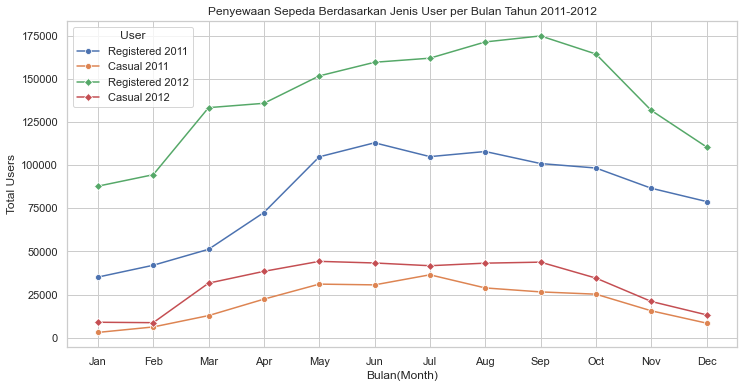

In [59]:
# Mengatur gaya plot menjadi whitegrid
sns.set(style="whitegrid")

# Membuat figure dengan ukuran 12x6
plt.figure(figsize=(12, 6))

# Lineplot untuk user_registered pada tahun 2011 dengan marker bulat ('o')
sns.lineplot(x='month', y='user_registered', data=monthly_data2011, marker='o', label='Registered 2011')

# Lineplot untuk user_casual pada tahun 2011 dengan marker bulat ('o')
sns.lineplot(x='month', y='user_casual', data=monthly_data2011, marker='o', label='Casual 2011')

# Lineplot untuk user_registered pada tahun 2012 dengan marker berbentuk diamond ('D')
sns.lineplot(x='month', y='user_registered', data=monthly_data2012, marker='D', label='Registered 2012')

# Lineplot untuk user_casual pada tahun 2012 dengan marker berbentuk diamond ('D')
sns.lineplot(x='month', y='user_casual', data=monthly_data2012, marker='D', label='Casual 2012')

# Menambahkan judul plot
plt.title('Penyewaan Sepeda Berdasarkan Jenis User per Bulan Tahun 2011-2012')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Bulan(Month)')
plt.ylabel('Total Users')

# Menyesuaikan label bulan untuk data tahun 2011 dan 2012
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Menambahkan legenda dengan judul 'User'
plt.legend(title='User')

# Menampilkan plot
plt.show()


### Pertanyaan 2:

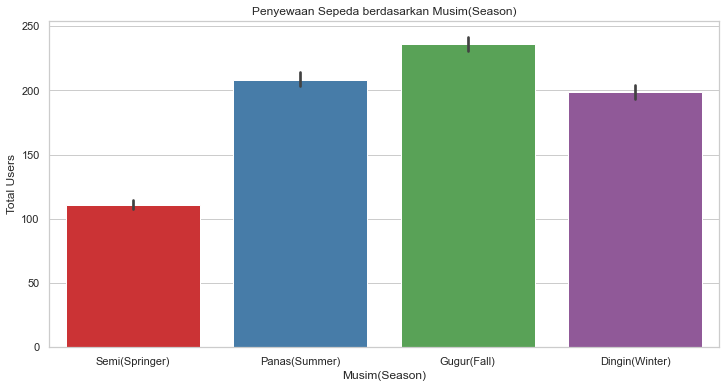

In [60]:
# Membuat figure dengan ukuran 12x6
plt.figure(figsize=(12, 6))

# Membuat bar plot untuk pengunaan berdasarkan musim(season)
sns.barplot(data=hour_df, x='season', y='count_total', palette='Set1')

# Menambahkan judul pada plot
plt.title('Penyewaan Sepeda berdasarkan Musim(Season)')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Musim(Season)')
plt.ylabel('Total Users')

# Mengatur label sumbu x menjadi nama musim dengan menggunakan plt.xticks
plt.xticks(range(0, 4), ['Semi(Springer)', 'Panas(Summer)', 'Gugur(Fall)', 'Dingin(Winter)'])

# Menampilkan plot
plt.show()


### PREDIKSI MENGGUNAKAN MOVING AVERAGE
Moving Average (MA), atau yang dikenal juga sebagai Rata-rata Bergerak, adalah metode statistik yang digunakan untuk merata-ratakan fluktuasi data sepanjang waktu dengan menggunakan jendela (window) tertentu. Dalam hal ini menggunakan 3 jendela, yaitu setiap nilai dalam kolom akan dihitung sebagai rata-rata dari nilai-nilai sekitarnya, yaitu nilai itu sendiri dan dua nilai sebelumnya. Tujuan utamanya adalah untuk mengidentifikasi tren atau pola dalam data.

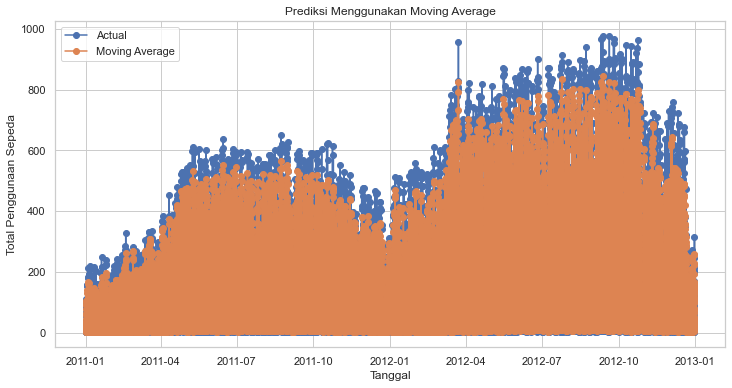

In [61]:
# Menambahkan kolom baru untuk moving average pada total penggunaan (count_total)
hour_df['moving_avg'] = hour_df['count_total'].rolling(window=3).mean()

# Menggunakan matplotlib untuk membuat plot dari data asli dan moving average
plt.figure(figsize=(12, 6))
plt.plot(hour_df['datetime'], hour_df['count_total'], label='Actual', marker='o')
plt.plot(hour_df['datetime'], hour_df['moving_avg'], label='Moving Average', marker='o')

# Menambahkan label dan judul
plt.xlabel('Tanggal')
plt.ylabel('Total Penggunaan Sepeda')
plt.title('Prediksi Menggunakan Moving Average')

# Menambahkan legenda untuk membedakan antara data asli dan moving average
plt.legend()

# Menampilkan plot
plt.show()


Hasil analisis menggunakan moving average dari data penyewaan sepeda tahun 2011-2012, menghasilkan prediksi penyewaan sepeda pada tahun berikutnya yaitu tahun 2013. Dapat dilihat nilai moving average dengan nilai asli (actual) memiliki perbedaan yang tidak terlalu signifikan. Hal ini dapat memperkuat prediksi yang dihasilkan.

## Conclusion

- Conclusion pertanyaan 1

Penyewaan sepeda (bike sharing) pada tahun 2011-2012 menunjukkan pola yang menarik. Pada tahun 2011 pengguna casual memuncak pada bulan Juli, sementara pengguna registered mencapai puncaknya pada bulan Juni. Namun, di tahun 2012, baik pengguna casual maupun registered lebih banyak menyewa sepeda pada bulan September.

Jika kita melihat periode 2011-2012, terdapat tren yang cukup mencolok. Jumlah penyewaan sepeda oleh pengguna casual mengalami kenaikan, meskipun tidak signifikan. Di sisi lain, pengguna registered mengalami lonjakan yang sangat drastis. Yang menarik adalah bahwa lonjakan terbesar pada keduanya terjadi pada bulan Maret dan September.

- Conclusion pertanyaan 2

Pengguna casual dan registered cenderung menyewa sepeda dalam jumlah yang lebih rendah selama musim pertama, yakni musim semi (springer), namun mengalami peningkatan yang signifikan saat memasuki musim kedua, yaitu musim panas (summer). Puncak aktivitas penyewaan terjadi pada musim ketiga, yaitu musim gugur (fall), dan mengalami penurunan kembali saat memasuki musim dingin (winter). Hal ini menunjukkan bahwa musim memiliki pengaruh terhadap penyewaan sepeda dimana user lebih banyak menyewa sepada dalam musim gugur.

